# Team 2 - Google Play Store

## Group: Phan Thanh Sang, Nguyễn Nhật Quang

## LMFAO - Chinese hackers, working for the Koreans
![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [1]:
# LMFAO - Chinese hackers, working for the Koreans

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling
import gc
import datetime
import re

%matplotlib inline

In [2]:
link = './data/google-play-store.csv'
store = pd.read_csv(link)

## Cleaning data

In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
store.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

In [6]:
store[store.isna().any(axis=1)].sort_values(by="Installs", ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
1559,Young Speeches,LIBRARIES_AND_DEMO,NaN,2221,2.4M,"500,000+",Free,0,Everyone,Libraries & Demo,"January 8, 2017",1.1,2.3 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
8062,Racing CX,GAME,NaN,4,20M,500+,Free,0,Everyone,Racing,"June 6, 2017",1,2.2 and up
7332,Weather Data CH,WEATHER,NaN,15,Varies with device,500+,Paid,$2.99,Everyone,Weather,"August 9, 2016",Varies with device,Varies with device
9515,Sanu Ek Pal Chain - Raid,TOOLS,NaN,1,2.6M,500+,Free,0,Everyone,Tools,"May 12, 2018",2.0,4.4W and up
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
4564,Tutorials for R Programming Offline,FAMILY,NaN,2,4.4M,500+,Free,0,Everyone,Education,"December 4, 2017",1.0,4.0 and up
9448,EJ.by,NEWS_AND_MAGAZINES,NaN,10,2.3M,500+,Free,0,Everyone,News & Magazines,"October 27, 2015",1.2,4.0.3 and up
7371,Valmet CI Tool,BUSINESS,NaN,1,3.7M,500+,Free,0,Everyone,Business,"March 13, 2018",0.0.6,4.0 and up


In [7]:
# remove NaN values
store.dropna(inplace=True)
store.isna().sum().sort_values(ascending=False)

Android Ver       0
Current Ver       0
Last Updated      0
Genres            0
Content Rating    0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

In [8]:
store['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [9]:
store['Reviews'] = store['Reviews'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [10]:
store['Installs'] = store['Installs'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [11]:
store['Price'] = store['Price'].apply(lambda x: float(re.sub("[^0-9/.]", "", x)))

In [12]:
for column in store.columns:
    print(column, "\n", store[column].unique(), "\n\n")

App 
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Fr. Mike Schmitz Audio Teachings' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology'] 


Category 
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION'] 


Rating 
 [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.2 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2] 


Reviews 
 [   159    967  87510 ...    603   1195 398307] 


Size 
 ['19M' '14M' '8.7M' '25

In [13]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1023.8+ KB


In [14]:
store.to_csv(r'./clean_data.csv', index = None, header=True)

In [15]:
df = store[store['Reviews'] >= 1000]

### All the 'Adults apps' ( ͡° ͜ʖ ͡°)

In [16]:
store[store['Content Rating'] == 'Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,Varies with device,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


### Top 5 apps with the most install, reviews with 'Content Rating' = 'Mature 17+'

In [17]:
store[store['Content Rating'] == 'Mature 17+'] \
    .groupby(by=['App'], as_index=False).max() \
    .sort_values(by=['Installs', 'Reviews'], ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
313,Twitter,NEWS_AND_MAGAZINES,4.3,11667403,Varies with device,500000000,Free,0.0,Mature 17+,News & Magazines,"July 30, 2018",Varies with device,Varies with device
271,Sniper 3D Gun Shooter: Free Shooting Games - FPS,GAME,4.6,7674252,Varies with device,100000000,Free,0.0,Mature 17+,Action,"August 2, 2018",Varies with device,Varies with device
319,VK,SOCIAL,3.8,5793284,Varies with device,100000000,Free,0.0,Mature 17+,Social,"August 3, 2018",Varies with device,Varies with device
292,Tango - Live Video Broadcast,SOCIAL,4.3,3806669,Varies with device,100000000,Free,0.0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
36,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781770,Varies with device,100000000,Free,0.0,Mature 17+,Social,"August 2, 2018",Varies with device,Varies with device


### Top 5 apps with highest rating, reviews

In [18]:
df.sort_values(by=['Rating', 'Reviews'], ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0.0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0.0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
4854,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272172,13M,10000000,Free,0.0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0.0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up


### Phải group by App vì ta thấy rằng app được tính riêng lẻ ở nhiều phiên bản (như 'Six Pack in 30 Days - Abs Workout'), lấy ra head của sắp xếp không giảm của 2 cột ['Rating', 'Review']

In [19]:
# Top 5 HIGHEST Rating, Reviews - with Review >= 1000

df.groupby(by=['App'], as_index=False).max().sort_values(by=['Rating', 'Reviews'], ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2324,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0.0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device
3199,Period Tracker,MEDICAL,4.9,325738,Varies with device,10000000,Free,0.0,Everyone,Medical,"July 9, 2018",Varies with device,Varies with device
3710,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0.0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
4125,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
2490,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0.0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up


In [20]:
# Top 5 LOWEST Rating, Reviews - with Review >= 1000

df.groupby(by=['App'], as_index=False).max().sort_values(by=['Rating', 'Reviews'], ascending=True).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1389,EB Mobile,FAMILY,1.7,1172,5.6M,10000,Free,0.0,Everyone,Education,"October 9, 2017",1.1.2,4.1 and up
3745,Smart-AC Universal Remote Free,FAMILY,1.8,3270,1.8M,500000,Free,0.0,Everyone,Entertainment,"August 18, 2015",1.0,2.2 and up
336,AppFinder by AppTap,TOOLS,2.0,2221,4.9M,5000000,Free,0.0,Everyone,Tools,"October 3, 2017",1.8.2.7,5.0 and up
846,Candy simply-Fi,LIFESTYLE,2.1,2390,35M,100000,Free,0.0,Everyone,Lifestyle,"July 17, 2018",1.8.4.7,4.4 and up
3167,PS4 Second Screen,FAMILY,2.4,11773,3.3M,1000000,Free,0.0,Everyone,Entertainment,"June 13, 2018",18.6.2,4.1 and up


### Average rating between same installs range

In [21]:
store.groupby(by=['Installs'], as_index=False).mean()

,Installs,Rating,Reviews,Price
0,1,5.000000,2.666667e+00,0.826667
1,5,4.611111,2.888889e+00,0.000000
2,10,4.624638,2.913043e+00,1.483623
3,50,4.419643,5.232143e+00,0.560536
4,100,4.363430,8.482201e+00,2.205049
5,500,4.176617,1.702488e+01,0.640050
6,1000,4.066292,4.432022e+01,3.601320
7,5000,4.026450,1.084432e+02,3.336334
8,10000,4.039247,3.554311e+02,2.440833
9,50000,4.051288,1.008886e+03,1.293691


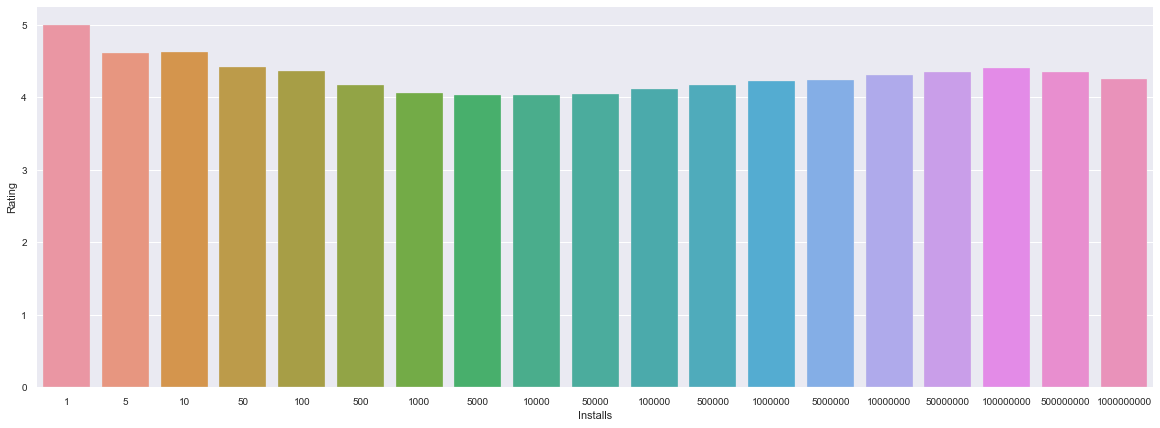

In [22]:
data = store.groupby(by=['Installs'], as_index=False).mean()

plt.figure(figsize=(20, 7))
ax = sns.barplot(x="Installs", y="Rating", data=data)

In [23]:
df[df['Category'] == 'GAME'].groupby(by=['App'], as_index=False).max().sort_values(by=['Rating', 'Reviews'], ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
585,Solitaire: Decked Out Ad Free,GAME,4.9,37302,35M,500000,Free,0.00,Everyone,Card,"May 8, 2017",1.3.3,4.1 and up
653,The Room: Old Sins,GAME,4.9,21119,48M,100000,Paid,4.99,Everyone,Puzzle,"April 18, 2018",1.0.1,4.4 and up
130,"Cash, Inc. Money Clicker Game & Business Adven...",GAME,4.8,549720,85M,10000000,Free,0.00,Everyone,Simulation,"July 19, 2018",2.1.1.4.0,4.4 and up
184,Dan the Man: Action Platformer,GAME,4.8,528550,73M,10000000,Free,0.00,Teen,Arcade,"July 26, 2018",1.2.6,4.1 and up
258,Fernanfloo,GAME,4.8,526595,49M,10000000,Free,0.00,Everyone 10+,Arcade,"June 26, 2018",2.9,4.0.3 and up


In [24]:
# Ví dụ tác hại của việc ko group by 'App' các ứng dụng được cập nhật sẽ nằm
# trên top hết làm cho kết luận của chúng ta bị sai
# (do các app được cập nhật Reviews tính riêng)

df[df['Category'] == 'GAME'] \
    .sort_values(by=['Installs', 'Rating', 'Reviews'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1872,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [25]:
df[df['Category'] == 'GAME'].groupby(by=['App'], as_index=False).max() \
    .sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
610,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
123,Candy Crush Saga,GAME,4.4,22430188,74M,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
455,My Talking Tom,GAME,4.5,14892469,Varies with device,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
495,Pou,GAME,4.3,10486018,24M,500000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
633,Temple Run 2,GAME,4.3,8119154,62M,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
141,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
140,Clash Royale,GAME,4.6,23136735,97M,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
6,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
553,Shadow Fight 2,GAME,4.6,10981850,88M,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
493,Pokémon GO,GAME,4.1,10424925,85M,100000000,Free,0.0,Everyone,Adventure,"July 23, 2018",0.111.3,4.4 and up


In [26]:
df[df['Category'] == 'DATING'].groupby(by=['App'], as_index=False).max() \
    .sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
65,Zoosk Dating App: Meet Singles,DATING,4.0,516917,Varies with device,10000000,Free,0.0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device
45,"Moco - Chat, Meet People",DATING,4.2,313769,Varies with device,10000000,Free,0.0,Mature 17+,Dating,"August 4, 2018",2.6.142,4.1 and up
36,Hot or Not - Find someone right now,DATING,4.1,305737,Varies with device,10000000,Free,0.0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device
49,OkCupid Dating,DATING,4.1,285838,15M,10000000,Free,0.0,Mature 17+,Dating,"July 30, 2018",11.10.1,4.1 and up
35,Hitwe - meet people and chat,DATING,4.2,243950,21M,10000000,Free,0.0,Mature 17+,Dating,"May 10, 2018",4.3.2,4.1 and up


In [27]:
df[df['Category'] == 'VIDEO_PLAYERS'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
96,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
39,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
51,MX Player,VIDEO_PLAYERS,4.5,6474672,Varies with device,500000000,Free,0.0,Everyone,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
90,VivaVideo - Video Editor & Photo Movie,VIDEO_PLAYERS,4.6,9879473,40M,100000000,Free,0.0,Teen,Video Players & Editors,"August 4, 2018",7.2.1,4.1 and up
88,"VideoShow-Video Editor, Video Maker, Beauty Ca...",VIDEO_PLAYERS,4.6,4016834,Varies with device,100000000,Free,0.0,Everyone,Video Players & Editors,"July 23, 2018",Varies with device,Varies with device


In [28]:
df[df['Category'] == 'WEATHER'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
40,Weather & Clock Widget for Android,WEATHER,4.4,2371543,11M,50000000,Free,0.0,Everyone,Weather,"June 4, 2018",5.9.4.0,4.0.3 and up
2,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2053404,Varies with device,50000000,Free,0.0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device
37,The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,4.4,1558437,Varies with device,50000000,Free,0.0,Everyone,Weather,"August 1, 2018",Varies with device,Varies with device
12,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.5,1422858,Varies with device,50000000,Free,0.0,Everyone,Weather,"August 3, 2018",Varies with device,Varies with device
59,Yahoo Weather,WEATHER,4.4,1312037,Varies with device,10000000,Free,0.0,Everyone,Weather,"August 1, 2018",Varies with device,Varies with device


In [29]:
df[df['Category'] == 'SHOPPING'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
124,Wish - Shopping Made Fun,SHOPPING,4.5,6212081,15M,100000000,Free,0.0,Everyone,Shopping,"August 3, 2018",4.20.5,4.1 and up
41,Flipkart Online Shopping App,SHOPPING,4.4,6012719,Varies with device,100000000,Free,0.0,Teen,Shopping,"August 6, 2018",Varies with device,Varies with device
3,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.6,5917485,Varies with device,100000000,Free,0.0,Teen,Shopping,"August 6, 2018",Varies with device,Varies with device
130,eBay: Buy & Sell this Summer - Discover Deals ...,SHOPPING,4.4,2788923,Varies with device,100000000,Free,0.0,Teen,Shopping,"July 30, 2018",Varies with device,Varies with device
5,Amazon Shopping,SHOPPING,4.3,909226,42M,100000000,Free,0.0,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up
70,Mercado Libre: Find your favorite brands,SHOPPING,4.7,3860225,Varies with device,50000000,Free,0.0,Everyone,Shopping,"August 3, 2018",Varies with device,Varies with device
64,Lazada - Online Shopping & Deals,SHOPPING,4.2,1573054,Varies with device,50000000,Free,0.0,Everyone,Shopping,"August 2, 2018",Varies with device,4.2 and up
46,"Groupon - Shop Deals, Discounts & Coupons",SHOPPING,4.6,1371082,Varies with device,50000000,Free,0.0,Teen,Shopping,"August 3, 2018",Varies with device,Varies with device
74,Myntra Online Shopping App,SHOPPING,4.3,1315242,Varies with device,50000000,Free,0.0,Everyone,Shopping,"July 21, 2018",3.27.1,4.1 and up
114,The birth,SHOPPING,4.7,1084945,Varies with device,50000000,Free,0.0,Teen,Shopping,"August 3, 2018",Varies with device,Varies with device


In [30]:
df[df['Category'] == 'NEWS_AND_MAGAZINES'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
49,Google News,NEWS_AND_MAGAZINES,3.9,878065,13M,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
98,Twitter,NEWS_AND_MAGAZINES,4.3,11667403,Varies with device,500000000,Free,0.0,Mature 17+,News & Magazines,"July 30, 2018",Varies with device,Varies with device
44,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284018,Varies with device,500000000,Free,0.0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
33,"Dailyhunt (Newshunt) - Latest News, Viral Videos",NEWS_AND_MAGAZINES,4.3,948198,Varies with device,50000000,Free,0.0,Teen,News & Magazines,"July 19, 2018",Varies with device,Varies with device
86,"Reddit: Social News, Trending Memes & Funny Vi...",NEWS_AND_MAGAZINES,4.6,697212,Varies with device,10000000,Free,0.0,Mature 17+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
70,News by The Times of India Newspaper - Latest ...,NEWS_AND_MAGAZINES,4.2,522205,Varies with device,10000000,Free,0.0,Everyone,News & Magazines,"August 7, 2018",Varies with device,Varies with device
69,News Republic,NEWS_AND_MAGAZINES,4.3,479594,18M,10000000,Free,0.0,Teen,News & Magazines,"July 28, 2018",9.2.3,4.0 and up
83,"Pulse Nabd - World News, Urgent",NEWS_AND_MAGAZINES,4.5,357944,12M,10000000,Free,0.0,Everyone,News & Magazines,"July 12, 2018",9.1,4.1 and up
18,BaBe - Read News,NEWS_AND_MAGAZINES,4.3,355921,17M,10000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",9.1.4,4.0 and up
16,BBC News,NEWS_AND_MAGAZINES,4.3,296781,Varies with device,10000000,Free,0.0,Everyone 10+,News & Magazines,"July 24, 2018",Varies with device,Varies with device


In [31]:
df[df['Category'] == 'SOCIAL'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
22,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
52,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
44,Google+,SOCIAL,4.2,4831125,Varies with device,1000000000,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
96,Snapchat,SOCIAL,4.0,17015352,Varies with device,500000000,Free,0.0,Teen,Social,"July 30, 2018",Varies with device,Varies with device
24,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,500000000,Free,0.0,Teen,Social,"August 1, 2018",Varies with device,Varies with device
117,VK,SOCIAL,3.8,5793284,Varies with device,100000000,Free,0.0,Mature 17+,Social,"August 3, 2018",Varies with device,Varies with device
111,Tik Tok - including musical.ly,SOCIAL,4.4,5637451,59M,100000000,Free,0.0,Teen,Social,"August 3, 2018",8.0.0,4.1 and up
87,Pinterest,SOCIAL,4.6,4305441,Varies with device,100000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
102,Tango - Live Video Broadcast,SOCIAL,4.3,3806669,Varies with device,100000000,Free,0.0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
7,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781770,Varies with device,100000000,Free,0.0,Mature 17+,Social,"August 2, 2018",Varies with device,Varies with device


In [32]:
df[df['Category'] == 'COMMUNICATION'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
147,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
87,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
115,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
62,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
59,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
66,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
133,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
135,Viber Messenger,COMMUNICATION,4.3,11335481,Varies with device,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
78,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,500000000,Free,0.0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
161,imo free video calls and chat,COMMUNICATION,4.3,4785988,11M,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up


In [33]:
df[df['Category'] == 'ENTERTAINMENT'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
28,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
54,Netflix,ENTERTAINMENT,4.4,5456708,Varies with device,100000000,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
35,Hotstar,ENTERTAINMENT,4.3,4885646,Varies with device,100000000,Free,0.0,Teen,Entertainment,"August 3, 2018",Varies with device,Varies with device
74,Talking Angela,ENTERTAINMENT,3.7,1828284,52M,100000000,Free,0.0,Everyone,Entertainment,"July 12, 2018",2.8.2,4.1 and up
75,Talking Ben the Dog,ENTERTAINMENT,4.3,1633682,57M,100000000,Free,0.0,Everyone,Entertainment,"July 3, 2018",3.5.2.2,4.1 and up
37,IMDb Movies & TV,ENTERTAINMENT,4.2,501498,12M,100000000,Free,0.0,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device
83,Twitch: Livestream Multiplayer Games & Esports,ENTERTAINMENT,4.6,2133296,Varies with device,50000000,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
76,Talking Ginger 2,ENTERTAINMENT,4.2,702975,49M,50000000,Free,0.0,Everyone,Entertainment,"July 5, 2018",2.6.6.11,4.1 and up
60,PlayStation App,ENTERTAINMENT,4.2,613059,25M,50000000,Free,0.0,Everyone,Entertainment,"July 26, 2018",18.07.0,4.1 and up
94,YouTube Kids,ENTERTAINMENT,4.5,470089,Varies with device,50000000,Free,0.0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up


In [34]:
df[df['Category'] == 'MAPS_AND_NAVIGATION'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,4.6,7232629,Varies with device,100000000,Free,0.0,Everyone,Maps & Navigation,"July 29, 2018",Varies with device,Varies with device
57,Uber,MAPS_AND_NAVIGATION,4.2,4928420,Varies with device,100000000,Free,0.0,Everyone,Maps & Navigation,"August 6, 2018",Varies with device,Varies with device
19,GPS Navigation & Offline Maps Sygic,MAPS_AND_NAVIGATION,4.4,1421884,33M,50000000,Free,0.0,Everyone,Maps & Navigation,"July 26, 2018",17.4.11,4.0.3 and up
18,Free GPS Navigation,MAPS_AND_NAVIGATION,4.2,618562,Varies with device,50000000,Free,0.0,Everyone,Maps & Navigation,"June 4, 2018",Varies with device,Varies with device
33,Moovit: Bus Time & Train Time Live Info,MAPS_AND_NAVIGATION,4.4,617477,Varies with device,10000000,Free,0.0,Everyone,Maps & Navigation,"August 5, 2018",Varies with device,Varies with device


In [35]:
df[df['Category'] == 'TRAVEL_AND_LOCAL'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
66,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
41,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
40,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,Varies with device,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
11,Booking.com Travel Deals,TRAVEL_AND_LOCAL,4.7,1830388,Varies with device,100000000,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
88,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.4,1162838,Varies with device,100000000,Free,0.0,Everyone,Travel & Local,"August 4, 2018",Varies with device,Varies with device


In [36]:
df[df['Category'] == 'FOOD_AND_DRINK'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
18,Domino's Pizza USA,FOOD_AND_DRINK,4.7,1032935,Varies with device,10000000,Free,0.0,Everyone,Food & Drink,"July 20, 2018",Varies with device,Varies with device
59,Tastely,FOOD_AND_DRINK,4.7,611136,19M,10000000,Free,0.0,Everyone,Food & Drink,"July 13, 2018",3.2.0d,4.0.3 and up
65,Zomato - Restaurant Finder and Food Delivery App,FOOD_AND_DRINK,4.3,511420,Varies with device,10000000,Free,0.0,Everyone,Food & Drink,"August 1, 2018",Varies with device,Varies with device
27,Foursquare City Guide,FOOD_AND_DRINK,4.1,483960,Varies with device,10000000,Free,0.0,Teen,Food & Drink,"July 23, 2018",Varies with device,Varies with device
57,Starbucks,FOOD_AND_DRINK,4.5,455496,35M,10000000,Free,0.0,Everyone,Food & Drink,"August 1, 2018",4.11.1,4.4 and up


In [37]:
df[df['Category'] == 'FINANCE'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
64,Google Pay,FINANCE,4.2,348132,Varies with device,100000000,Free,0.0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device
99,PayPal,FINANCE,4.3,659760,47M,50000000,Free,0.0,Everyone,Finance,"July 18, 2018",6.28.0,4.4 and up
34,Chase Mobile,FINANCE,4.6,1374549,32M,10000000,Free,0.0,Everyone,Finance,"July 23, 2018",3.52,5.0 and up
15,Bank of Brazil,FINANCE,4.5,1336246,39M,10000000,Free,0.0,Everyone,Finance,"August 3, 2018",6.39.1.4,4.1 and up
72,Itau bank,FINANCE,4.2,957973,40M,10000000,Free,0.0,Everyone,Finance,"July 30, 2018",6.5.7,4.2 and up
40,Credit Karma,FINANCE,4.7,706618,Varies with device,10000000,Free,0.0,Everyone,Finance,"July 31, 2018",Varies with device,Varies with device
31,Capital One® Mobile,FINANCE,4.6,510401,79M,10000000,Free,0.0,Everyone,Finance,"August 1, 2018",5.38.1,5.0 and up
143,İşCep,FINANCE,4.5,381788,32M,10000000,Free,0.0,Everyone,Finance,"August 2, 2018",3.22.0,4.1 and up
14,Bank of America Mobile Banking,FINANCE,4.4,341090,53M,10000000,Free,0.0,Everyone,Finance,"July 31, 2018",7.8.8,4.4 and up
28,CASHIER,FINANCE,3.3,335738,Varies with device,10000000,Free,0.0,Everyone,Finance,"May 3, 2018",Varies with device,Varies with device


In [38]:
df[df['Category'] == 'EDUCATION'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
13,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
52,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107948,Varies with device,10000000,Free,0.0,Everyone,Education,"August 2, 2018",Varies with device,Varies with device
62,Math Tricks,EDUCATION,4.5,342918,8.1M,10000000,Free,0.0,Everyone,Education,"July 29, 2018",2.24,4.0 and up
45,Learn English with Wlingua,EDUCATION,4.7,314300,3.3M,10000000,Free,0.0,Everyone,Education,"May 2, 2018",1.94.9,4.0 and up
70,Peak – Brain Games & Training,EDUCATION,4.4,272145,Varies with device,10000000,Free,0.0,Everyone,Education;Brain Games,"August 3, 2018",3.14.15,5.0 and up


In [39]:
df[df['Category'] == 'COMICS'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
11,LINE WEBTOON - Free Comics,COMICS,4.5,1013944,Varies with device,10000000,Free,0.0,Teen,Comics,"July 31, 2018",Varies with device,Varies with device
21,Narrator's Voice,COMICS,4.5,564387,Varies with device,5000000,Free,0.0,Everyone,Comics,"July 5, 2018",Varies with device,Varies with device
28,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965,15M,5000000,Free,0.0,Teen,Comics,"July 3, 2018",6.3.0,4.0.3 and up
22,Perfect Viewer,COMICS,4.4,51981,Varies with device,5000000,Free,0.0,Everyone,Comics,"August 1, 2018",4.2.0.2,2.3 and up
4,Comics,COMICS,4.1,45651,Varies with device,5000000,Free,0.0,Teen,Comics,"May 24, 2018",Varies with device,Varies with device


In [40]:
# Ở đây em thấy nó ghê ghê khi cái rating low nên em sắp theo rating rồi reviews lại để xem có khá hơn ko
# Kết luận: cũng khá tương tự

df[df['Category'] == 'COMICS'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Rating', 'Reviews'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
11,LINE WEBTOON - Free Comics,COMICS,4.5,1013944,Varies with device,10000000,Free,0.0,Teen,Comics,"July 31, 2018",Varies with device,Varies with device
21,Narrator's Voice,COMICS,4.5,564387,Varies with device,5000000,Free,0.0,Everyone,Comics,"July 5, 2018",Varies with device,Varies with device
22,Perfect Viewer,COMICS,4.4,51981,Varies with device,5000000,Free,0.0,Everyone,Comics,"August 1, 2018",4.2.0.2,2.3 and up
4,Comics,COMICS,4.1,45651,Varies with device,5000000,Free,0.0,Teen,Comics,"May 24, 2018",Varies with device,Varies with device
28,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965,15M,5000000,Free,0.0,Teen,Comics,"July 3, 2018",6.3.0,4.0.3 and up


In [41]:
df[df['Category'] == 'BEAUTY'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715,Varies with device,10000000,Free,0.0,Everyone,Beauty,"August 3, 2017",Varies with device,Varies with device
2,Best Hairstyles step by step,BEAUTY,4.5,45452,9.2M,5000000,Free,0.0,Everyone,Beauty,"July 19, 2018",1.25,4.0 and up
18,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,0.0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
17,Ulta Beauty,BEAUTY,4.7,42050,Varies with device,1000000,Free,0.0,Everyone,Beauty,"June 5, 2018",5.4,5.0 and up
10,Mirror - Zoom & Exposure -,BEAUTY,3.9,32090,Varies with device,1000000,Free,0.0,Everyone,Beauty,"October 24, 2016",Varies with device,Varies with device


In [42]:
df[df['Category'] == 'MEDICAL'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
42,My Calendar - Period Tracker,MEDICAL,4.7,156410,14M,5000000,Free,0.0,Everyone,Medical,"August 3, 2018",5.9.6,4.1 and up
8,Blood Pressure,MEDICAL,4.2,33033,7.4M,5000000,Free,0.0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up
52,Ovia Pregnancy Tracker & Baby Countdown Calendar,MEDICAL,4.8,102858,9.8M,1000000,Free,0.0,Everyone,Medical,"August 3, 2018",2.2.4,4.3 and up
53,Period Tracker,MEDICAL,4.9,100082,3.7M,1000000,Free,0.0,Everyone,Medical,"July 9, 2018",1.2.2,4.1 and up
2,Ada - Your Health Guide,MEDICAL,4.7,87418,14M,1000000,Free,0.0,Everyone,Medical,"July 16, 2018",2.25.0,4.4 and up


In [43]:
df[df['Category'] == 'PARENTING'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
19,Pregnancy Tracker & Countdown to Baby Due Date,PARENTING,4.7,658087,62M,10000000,Free,0.0,Everyone,Parenting,"May 24, 2018",3.15.1,5.0 and up
17,My baby Piano,PARENTING,3.9,17941,Varies with device,5000000,Free,0.0,Everyone,Parenting;Music & Video,"May 27, 2018",Varies with device,Varies with device
12,Feed Baby - Baby Tracker,PARENTING,4.5,76795,18M,1000000,Free,0.0,Everyone,Parenting,"August 1, 2018",2.0.6,4.1 and up
5,Baby Sleep: White noise lullabies for newborns,PARENTING,4.6,62386,3.4M,1000000,Free,0.0,Everyone,Parenting,"June 12, 2018",2.7,4.0 and up
10,Family Album Mitene: Private Photo & Video Sha...,PARENTING,4.7,34336,Varies with device,1000000,Free,0.0,Everyone,Parenting,"July 31, 2018",Varies with device,Varies with device


In [44]:
df[df['Category'] == 'TOOLS'].groupby(by=['App'], as_index=False) \
    .max().sort_values(by=['Installs', 'Reviews', 'Rating'], ascending=False) \
    .head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
180,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
88,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
282,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
270,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17M,500000000,Free,0.0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up
184,Google Translate,TOOLS,4.4,5745093,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
